In [1]:
# module i'll use
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")

In [2]:
# reading the datasets
df_raw = pd.read_csv('data/pet_sales.csv')

# change number of show rows
pd.set_option("display.max_rows", 1000)

In [3]:
# look at the total rows in the datasets
df_raw.shape

(879, 9)

In [4]:
# print the first 5 row for the datasets
df_raw.head()

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
0,5040,Equipment,"$123,000",94.81,VC_1605,small,fish,7,1
1,4567,Toys,"$61,000",120.95,VC_1132,small,cat,10,0
2,4237,Toys,"$218,000",106.34,VC_802,small,hamster,6,0
3,4364,Snack,"$69,000",241.27,VC_929,large,dog,1,1
4,4184,Supplements,"$138,000",133.68,VC_749,large,dog,10,0


# Data Validation

In [5]:
# looking at the general info of the dataset
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        879 non-null    int64  
 1   product_category  879 non-null    object 
 2   sales             879 non-null    object 
 3   price             879 non-null    float64
 4   vendor_id         879 non-null    object 
 5   pet_size          879 non-null    object 
 6   pet_type          879 non-null    object 
 7   rating            879 non-null    int64  
 8   re_buy            879 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 61.9+ KB


In [6]:
# re-checking the null values
df_raw.isna().any()

product_id          False
product_category    False
sales               False
price               False
vendor_id           False
pet_size            False
pet_type            False
rating              False
re_buy              False
dtype: bool

In [7]:
# re-checking the data types
df_raw.dtypes

product_id            int64
product_category     object
sales                object
price               float64
vendor_id            object
pet_size             object
pet_type             object
rating                int64
re_buy                int64
dtype: object

In [8]:
# looking at the summary numerical data
df_raw.describe()

,product_id,price,rating,re_buy
count,879.00000,879.000000,879.000000,879.000000
mean,4611.00000,128.212253,6.500569,0.466439
std,253.88974,71.923583,2.852835,0.499156
min,4172.00000,0.350000,1.000000,0.000000
25%,4391.50000,65.210000,5.000000,0.000000
50%,4611.00000,129.520000,6.000000,0.000000
75%,4830.50000,188.220000,10.000000,1.000000
max,5050.00000,252.690000,10.000000,1.000000


## Data Cleaning Process

### Cleaning the sales column

In [9]:
# cleaning the sales columns
df_raw['sales'] = df_raw['sales'].apply(lambda x: x.split('$')[1])

# replace comma with none
df_raw['sales'] = df_raw['sales'].replace(',', '', regex=True)

# changing the data type
df_raw['sales'] = df_raw['sales'].astype(int)

In [10]:
# show the first 5 rows
df_raw.head()

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
0,5040,Equipment,123000,94.81,VC_1605,small,fish,7,1
1,4567,Toys,61000,120.95,VC_1132,small,cat,10,0
2,4237,Toys,218000,106.34,VC_802,small,hamster,6,0
3,4364,Snack,69000,241.27,VC_929,large,dog,1,1
4,4184,Supplements,138000,133.68,VC_749,large,dog,10,0


In [11]:
# re-check df_raw data types
df_raw.dtypes

product_id            int64
product_category     object
sales                 int32
price               float64
vendor_id            object
pet_size             object
pet_type             object
rating                int64
re_buy                int64
dtype: object

### Cleaning the pet_type column

In [12]:
# checking the pet types unique values
df_raw["pet_type"].unique()

array(['fish', 'cat', 'hamster', 'dog', 'bird', 'rabbit'], dtype=object)

In [13]:
# making pets list which only be included int the analyis
pets = ["cat", "dog", "fish", "bird"]

# filtering pet types
filt = df_raw["pet_type"].isin(pets)

# making the dataframe variable
pet_sales = df_raw[filt]

# drop unnecessary columns / keeping the important columns
pet_sales = pet_sales[["product_category", "sales", "price", "pet_type", "rating", "re_buy"]]

# adding new column "count" for counting agg
pet_sales["count"] = 1

In [14]:
# print new dataframe variable
pet_sales.head()

,product_category,sales,price,pet_type,rating,re_buy,count
0,Equipment,123000,94.81,fish,7,1,1
1,Toys,61000,120.95,cat,10,0,1
3,Snack,69000,241.27,dog,1,1,1
4,Supplements,138000,133.68,dog,10,0,1
5,Bedding,183000,51.60,cat,10,0,1


In [15]:
# checking the pet types unique values
pet_sales["pet_type"].unique()

array(['fish', 'cat', 'dog', 'bird'], dtype=object)

Several things that have been done in the data validation process are making sure whether the unique values for each column match the same amount in the data description, checking whether there are null values, doing data cleaning on the sales column so that it can be converted into an integer data type, do a filter to only use the important columns, and filter the pet type because we only need the pet type "cat", "dog", "fish", and "bird".

# Data Discovery and Visualization

## How many products are being purchased more than once?

In [16]:
pet_sales.head()

,product_category,sales,price,pet_type,rating,re_buy,count
0,Equipment,123000,94.81,fish,7,1,1
1,Toys,61000,120.95,cat,10,0,1
3,Snack,69000,241.27,dog,1,1,1
4,Supplements,138000,133.68,dog,10,0,1
5,Bedding,183000,51.60,cat,10,0,1


In [17]:
# grouped pet sales by re_buy so we can see the total purchased product difference
grp_pet_sales = pet_sales.groupby('re_buy').count().reset_index()

# print the first 5 rows
grp_pet_sales

,re_buy,product_category,sales,price,pet_type,rating,count
0,0,443,443,443,443,443,443
1,1,390,390,390,390,390,390


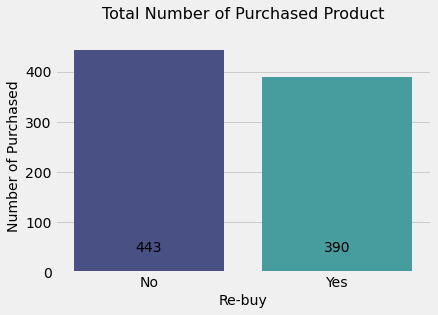

In [18]:
# visualizating the gropued pet sales by re_buy so we can actually see the differences
fg = sns.barplot(x='re_buy', y='count', data = grp_pet_sales, palette='mako')

# set the x dan y label
fg.set_xlabel("Re-buy", fontsize=14)
fg.set_ylabel("Number of Purchased", fontsize=14)

# set the title
fg.set_title("Total Number of Purchased Product", y=1.06, fontsize=16)

# settings the xtick labels
fg.set_xticklabels(["No", "Yes"])

# show the values in the container
fg.text(1, 40, grp_pet_sales["count"][1], color='black', ha='center')
fg.text(0, 40, grp_pet_sales["count"][0], color='black', ha='center')

# show the plot
plt.show()

Now we can conclude that the total purchased product on re_buy=0 is more with a total of 443, while on re_buy=1 there are 390 purchased products.

In [19]:
# filtering pet_sales for product only purchased more than once
filt_pet_sales = pet_sales[pet_sales["re_buy"] == 1]

# print the first 5 rows
filt_pet_sales.head()

,product_category,sales,price,pet_type,rating,re_buy,count
0,Equipment,123000,94.81,fish,7,1,1
3,Snack,69000,241.27,dog,1,1,1
9,Medicine,141000,248.07,dog,10,1,1
10,Snack,185000,188.23,dog,10,1,1
12,Housing,93000,211.47,dog,10,1,1


In [20]:
# group dataset by product_category
grouped_filt_pet_sales = filt_pet_sales.groupby("product_category").sum().reset_index()

# print
grouped_filt_pet_sales

,product_category,sales,price,rating,re_buy,count
0,Accessory,2994000,2758.88,131,20,20
1,Bedding,2983000,2922.42,171,24,24
2,Clothes,2241000,2149.84,140,19,19
3,Equipment,8660000,9268.43,379,69,69
4,Food,3972000,4632.86,293,37,37
5,Grooming,2109000,2298.11,112,17,17
6,Housing,2490000,2208.92,145,20,20
7,Medicine,4374000,5318.15,252,37,37
8,Snack,6761000,7201.79,301,59,59
9,Supplements,3069000,3632.12,228,30,30


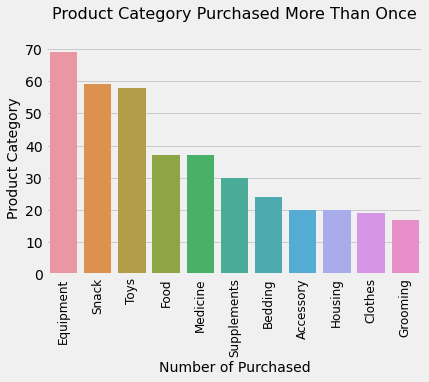

In [21]:
# visualize all products category purchased with the most number of sales

fg = sns.barplot(x="product_category", y="re_buy", data=grouped_filt_pet_sales.sort_values("count", ascending=False))

# set x and y label
fg.set_xlabel("Number of Purchased", fontsize=14)
fg.set_ylabel("Product Category", fontsize=14)

# set the title
fg.set_title("Product Category Purchased More Than Once", y=1.07, fontsize=16)

# show the values containers
#fg.bar_label(fg.containers[0])

# settings the xticks labels
plt.xticks(rotation=90, fontsize=12)

# show plot
plt.show()

We can see that Equipment is the best-selling product category for Pet Sales with total sales of 69, and the second best-selling product category is Snack with total sales of 59, then there is the Toys product category with sales almost the same as Snack, which is 58 product sales.

## Do the products being purchased again have better sales than others?

In [22]:
# recall pet_sales
pet_sales.head()

,product_category,sales,price,pet_type,rating,re_buy,count
0,Equipment,123000,94.81,fish,7,1,1
1,Toys,61000,120.95,cat,10,0,1
3,Snack,69000,241.27,dog,1,1,1
4,Supplements,138000,133.68,dog,10,0,1
5,Bedding,183000,51.60,cat,10,0,1


In [23]:
# filtering only necessary columns for this task
sales_vs_rebuy = pet_sales[["product_category", "sales", "re_buy", "count"]]

# print the first 5 rows
sales_vs_rebuy.head()

,product_category,sales,re_buy,count
0,Equipment,123000,1,1
1,Toys,61000,0,1
3,Snack,69000,1,1
4,Supplements,138000,0,1
5,Bedding,183000,0,1


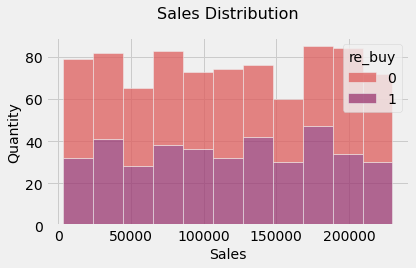

In [24]:
# make a histogram plot to see the distribution of sales
fg = sns.histplot(x='sales', data=sales_vs_rebuy, hue='re_buy', multiple="stack", palette='flare')

# set the x and y label
fg.set_xlabel("Sales", fontsize=14)
fg.set_ylabel("Quantity", fontsize=14)

# set the title
fg.set_title("Sales Distribution", y=1.07, fontsize=16)

# tighten the plot
plt.tight_layout()

# show plot
plt.show()

As we can see, based on the histogram distribution that we have created, the number of sales is higher at re_buy=0, although there is no significant difference. So we can conclude that it is not related to whether the product is purchased more than once or not.

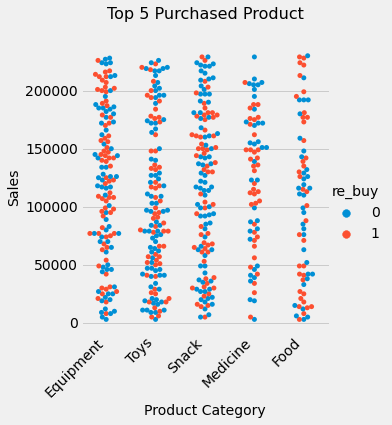

In [25]:
# Now we will take a look at the top 5 purchased products whether they are purchased more than once or not

# making the top 5 list product categories
top5 = ["Equipment", "Snack", "Toys", "Food", "Medicine"]

# filtering the top 5 categories
top5_pet_sales = pet_sales[pet_sales["product_category"].isin(top5)]

# plotting categories
fg = sns.catplot(data=top5_pet_sales, kind="swarm", x="product_category", y="sales", hue="re_buy")

# setting x and y label
fg.axes[0,0].set_xlabel("Product Category", fontsize=14)
fg.axes[0,0].set_ylabel("Sales", fontsize=14)

# setting title label
fg.axes[0,0].set_title("Top 5 Purchased Product", y=1.06, fontsize=16)

# setting xtick labels
fg.set_xticklabels(rotation=45, horizontalalignment='right')

# show plot
plt.show()

we can see that the product categories that sell the most are Equipment, Snack and Toys judging from the number of points that occur, in addition to whether the product was purchased more than once or not.

In [26]:
# looking the sum of sales group by re_buy
# answer task 2
grouped_sales_vs_rebuy = sales_vs_rebuy.groupby(["re_buy"]).sum().reset_index()

# print
grouped_sales_vs_rebuy

,re_buy,sales,count
0,0,51125000,443
1,1,45587000,390


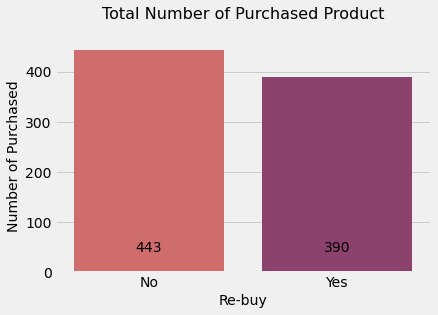

In [27]:
# visualizing the answer task 2
fg = sns.barplot(x='re_buy', y='count', data=grouped_sales_vs_rebuy, palette='flare')

# set the x and y label
fg.set_xlabel("Re-buy", fontsize=14)
fg.set_ylabel("Number of Purchased", fontsize=14)

# set the title
fg.set_title("Total Number of Purchased Product", y=1.06, fontsize=16)

# set xtick labels
fg.set_xticklabels(["No", "Yes"])

# show the values in the containers
fg.text(1, 40, grouped_sales_vs_rebuy["count"][1], color='black', ha='center')
fg.text(0, 40, grouped_sales_vs_rebuy["count"][0], color='black', ha='center')

# show plot
plt.show()

After looking directly at the numerical data, we can draw the conclusion that the total sales does not depend on the product being sold more than once or not. We can also see that the reason why sales could be higher at re_buy=0 is because more products were purchased (443 products purchased).

## What products are more likely to be purchased again for different types of pets?

In [28]:
# recall last filter pet sales dataset
filt_pet_sales.head()

,product_category,sales,price,pet_type,rating,re_buy,count
0,Equipment,123000,94.81,fish,7,1,1
3,Snack,69000,241.27,dog,1,1,1
9,Medicine,141000,248.07,dog,10,1,1
10,Snack,185000,188.23,dog,10,1,1
12,Housing,93000,211.47,dog,10,1,1


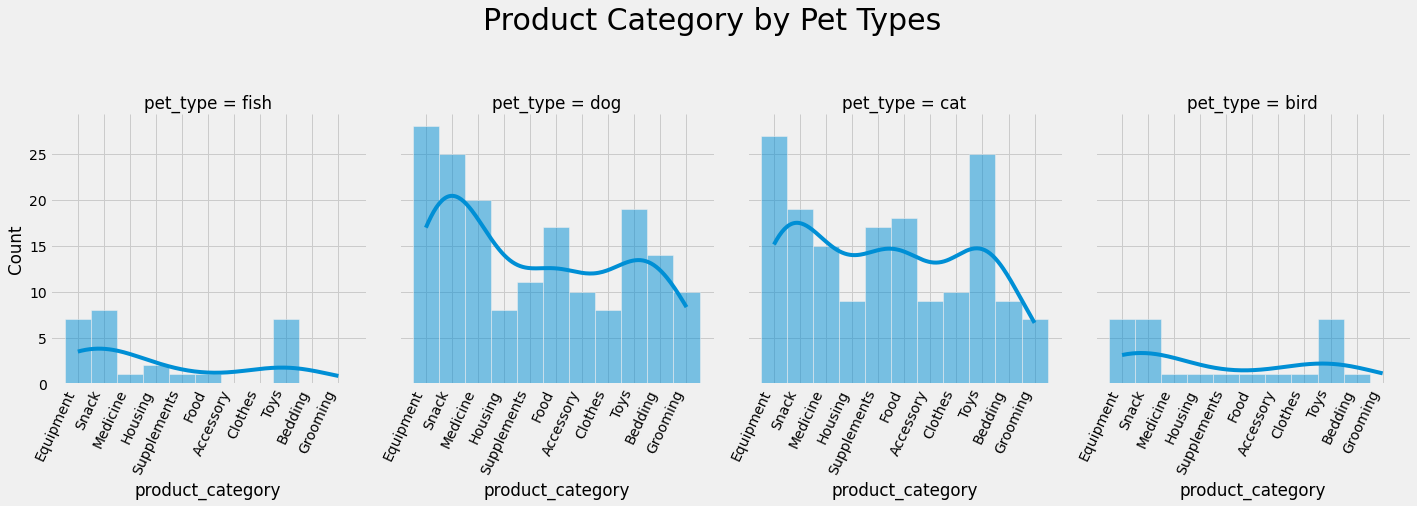

In [29]:
# before answering the last task, i want to looking at the general distribution category by pet_type
fg = sns.displot(data=filt_pet_sales, x="product_category", col="pet_type", kde=True)

# setting up the xticks labels
fg.set_xticklabels(rotation=65, horizontalalignment='right')

# set the title
fg.fig.suptitle('Product Category by Pet Types', y=1.2, fontsize=30)

# show plot
plt.show()

From the distribution graph above, it can be seen that sales of product categories are generally more in demand by pet dogs and cats. Then it can be seen that the Equipment product category is the most consistently in demand in the four pet categories, followed by the Snack product category.

In [30]:
# grouped pet_sales by pet_type and product_category so we can easily identify the total of purchased product
pets = filt_pet_sales.groupby(["pet_type", "product_category"])[["count", "sales"]].sum().reset_index()

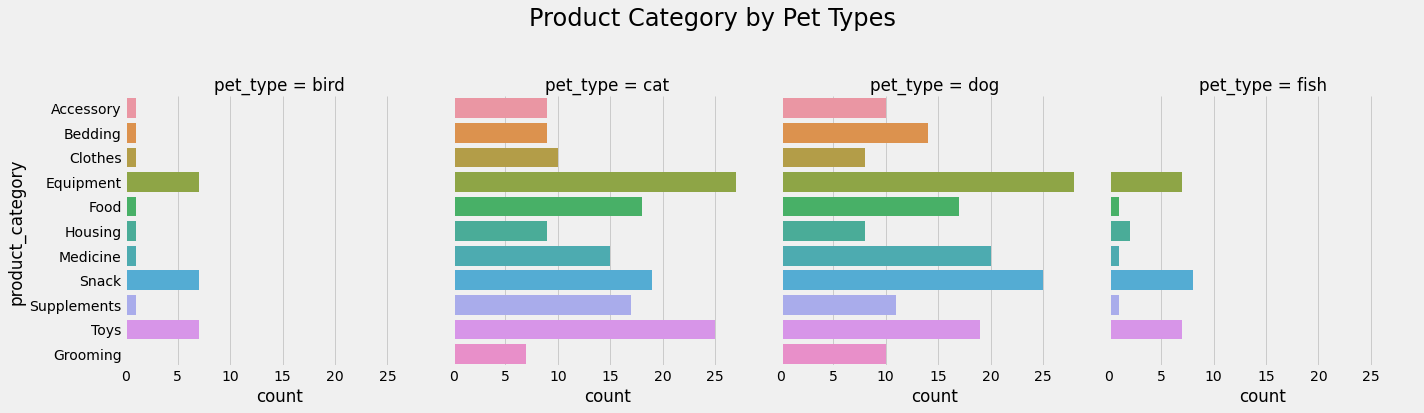

In [31]:
# Visualizing the grouped filtered pet_sales
# answering task 3
fg = sns.catplot(kind="bar", y="product_category", 
                 x="count", col="pet_type", data=pets)

# set the title
fg.fig.suptitle('Product Category by Pet Types', y=1.15, fontsize=24)

# show plot
plt.show()

After visualizing the total purchased product with the product category which is divided into four parts based on the pet_type category, we can see that the product categories that are most frequently purchased for each type of pets are different. For the Bird category, there are three best-selling products, namely Equipment, Snack, and Toys. For the Cats category, the best-selling product categories were Equipment and Toys with 27 and 25 sales, respectively. The best-selling product categories for Dogs were Equipment with 28 sales and Snacks with 25 sales. As for fish pet_type, which is the least in total sales, the product category that sells the most is Snack and Equipment with 8 and 7 total product sales, respectively.